<a href="https://colab.research.google.com/github/Lotaristo/lotaristo.github.io/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Создание модели по предсказанию фейковых новостей.

### Загрузка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/fake_news.csv')
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Создание моделей

Попробуем 3 модели - только название, только текст и текст + название



#### Модель 1 - только название

In [ ]:
df.label = df.label.replace({"FAKE":1, 'REAL' : 0})
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [ ]:
y = df.label
x1 = df.title
x1_train, x_test, y1_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=12)

In [ ]:
# Преобразование в tfidf
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train1 = tfidf_vectorizer.fit_transform(x1_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [ ]:
# Создание и обучение модели PassiveAggressiveClassifier
pac_model1 = PassiveAggressiveClassifier(max_iter=50)
pac_model1.fit(tfidf_train1, y1_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
y_pred1 = pac_model1.predict(tfidf_test)

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       957
           1       0.76      0.75      0.76       944

    accuracy                           0.76      1901
   macro avg       0.76      0.76      0.76      1901
weighted avg       0.76      0.76      0.76      1901



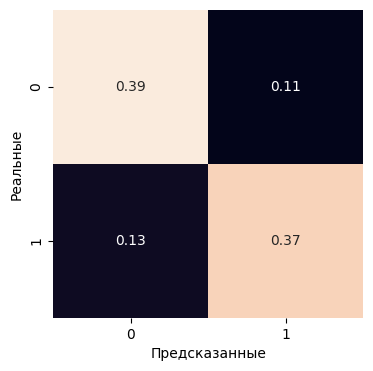

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred1)
conf_matrix = conf_matrix / conf_matrix.sum()

plt.figure(figsize = (4, 4))
sns.heatmap(conf_matrix, annot = True, fmt=".2f", cbar=False)
plt.xlabel("Предсказанные")
plt.ylabel("Реальные");

#### Модель 2 - только текст

In [ ]:
x2 = df.text
x2_train, x_test, y2_train, y_test = train_test_split(x2, y, test_size=0.3, random_state=12)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train2 = tfidf_vectorizer.fit_transform(x2_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [ ]:
pac_model2 = PassiveAggressiveClassifier(max_iter=50)
pac_model2.fit(tfidf_train2, y2_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
y_pred2 = pac_model2.predict(tfidf_test)

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       957
           1       0.95      0.94      0.95       944

    accuracy                           0.95      1901
   macro avg       0.95      0.95      0.95      1901
weighted avg       0.95      0.95      0.95      1901



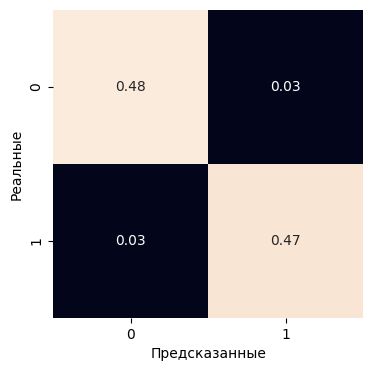

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred2)
conf_matrix = conf_matrix / conf_matrix.sum()

plt.figure(figsize = (4, 4))
sns.heatmap(conf_matrix, annot = True, fmt=".2f", cbar=False)
plt.xlabel("Предсказанные")
plt.ylabel("Реальные");

#### Модель 3 - название и текст

In [ ]:
x3 = df.title + ' ' + df.text
x3_train, x_test, y3_train, y_test = train_test_split(x3, y, test_size=0.3, random_state=12)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train3 = tfidf_vectorizer.fit_transform(x3_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [ ]:
pac_model3 = PassiveAggressiveClassifier(max_iter=50)
pac_model3.fit(tfidf_train3, y3_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
y_pred3 = pac_model3.predict(tfidf_test)

In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       957
           1       0.94      0.94      0.94       944

    accuracy                           0.94      1901
   macro avg       0.94      0.94      0.94      1901
weighted avg       0.94      0.94      0.94      1901



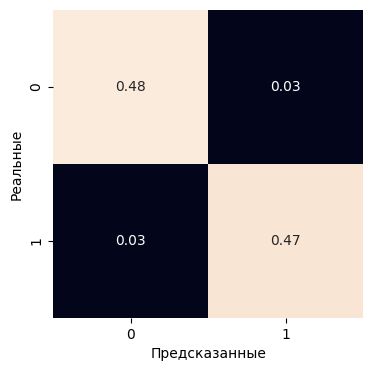

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred3)
conf_matrix = conf_matrix / conf_matrix.sum()

plt.figure(figsize = (4, 4))
sns.heatmap(conf_matrix, annot = True, fmt=".2f", cbar=False)
plt.xlabel("Предсказанные")
plt.ylabel("Реальные");

Как мы видим, одного название недостаточно для точного предсказания. В то же время, добавление названия к описанию не увеличивает точность.
